<h1>Séries Temporais - Gráficos de Linha(s)</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = (
    "#03045e",
    "#0077b6",
    "#00b4d8",
    "#90e0ef",
    "#CDDBF3",
)

CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = (
    "#212529",
    "#495057",
    "#adb5bd",
    "#dee2e6",
    "#f8f9fa",
)

VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = (
    "#e76f51",
    "#f4a261",
    "#e9c46a",
    "#4c956c",
    "#2a9d8f",
)

In [2]:
# Loading dataset
src = "https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv"
vendas = pd.read_csv(filepath_or_buffer=src)
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [3]:
# Mudando para tipo datetime => séries temporais.
for col in ["data_pedido", "data_envio"]:
    vendas[col] = pd.to_datetime(vendas[col], format="%Y-%m-%d")

<font size=5 color = "#ff9900"> Qual o total de vendas, por trimestre, do estado de São Paulo?</font>

Mudaremos a amostragem para amostragem por trimestres, i.e: Q1, Q2, Q3, Q4. Para isso, utilizamos o método `.resample` que aplica uma regra de reamostragem em uma série temporal.

In [4]:
# Divisão por trimestre => Reamostragem dos dados.
vendas_sp = vendas.query("estado == 'São Paulo'")[["data_pedido", "vendas"]]

display(vendas_sp)
print("Criando a série temporal (index como datetime).")

vendas_sp = vendas_sp.set_index("data_pedido")
vendas_sp = vendas_sp.resample(rule="QE").agg("sum")

print("Série Temporal Trimestral:\n")
display(vendas_sp)

vendas_sp["vendas_milhar"] = vendas_sp["vendas"].apply(lambda x: round(x / 1_000, 2))
vendas_sp = vendas_sp.reset_index()

,data_pedido,vendas
0,2018-11-09,890.66
1,2018-11-09,2488.59
16,2016-11-12,2263.98
38,2019-09-11,500.36
42,2016-10-21,720.64
...,...,...
8915,2018-12-06,372.96
8919,2017-06-29,406.50
8920,2017-06-29,478.55
8929,2017-09-07,292.33


Criando a série temporal (index como datetime).
Série Temporal Trimestral:



,vendas
data_pedido,
2016-03-31,41872.61
2016-06-30,43786.60
2016-09-30,154907.38
2016-12-31,144824.39
2017-03-31,36132.67
2017-06-30,76862.33
2017-09-30,129761.66
2017-12-31,197939.65
2018-03-31,44262.64


In [5]:
vendas_sp = vendas_sp.drop(columns="vendas")

In [6]:
vendas_sp.describe()

,data_pedido,vendas_milhar
count,16,16.00000
mean,2018-02-13 18:00:00,125.68125
min,2016-03-31 00:00:00,36.13000
25%,2017-03-08 12:00:00,59.86750
50%,2018-02-14 00:00:00,118.68000
75%,2019-01-22 12:00:00,155.68500
max,2019-12-31 00:00:00,325.57000
std,NaN,83.45454


In [7]:
# ---
# Formatar datas no matplotlib
import matplotlib.dates as mdates

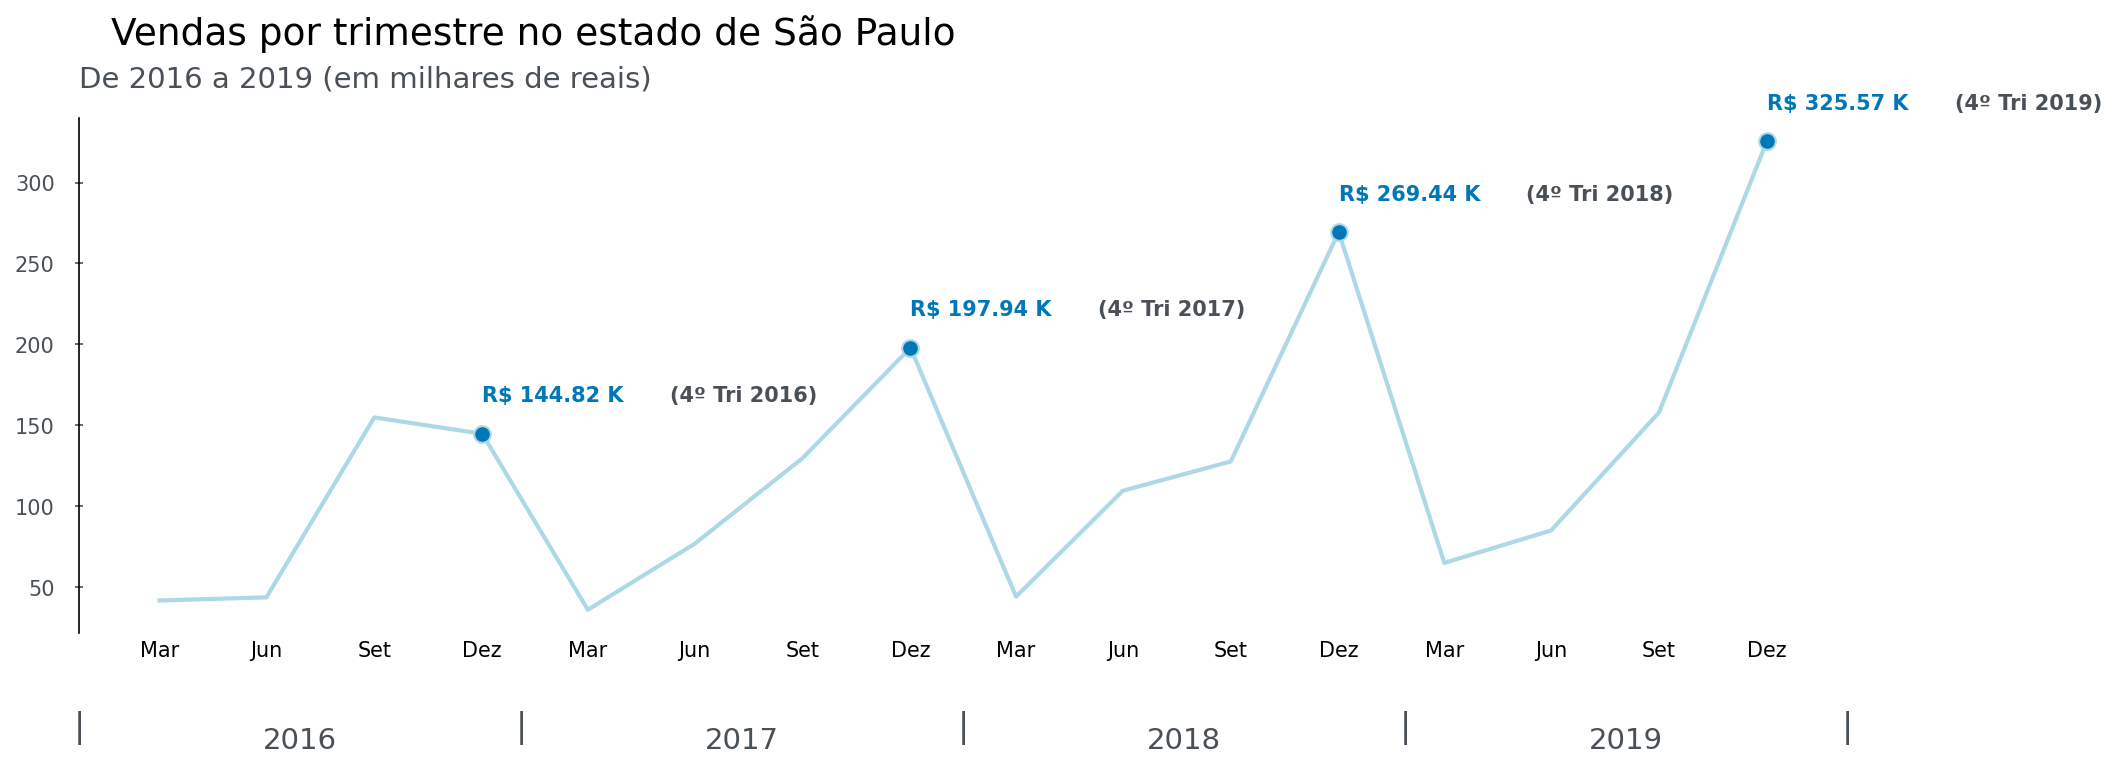

In [8]:
# Anotando os valores de maior venda em Q1, Q2, Q3, Q4
marker_step: list[bool] = [
    True if month == 12 else False for month in vendas_sp["data_pedido"].dt.month
]
# ---

fig, ax = plt.subplots(figsize=(14, 5), dpi=150, layout="constrained")
fig.suptitle("Vendas por trimestre no estado de São Paulo", x=0.25, fontsize=18)

ax.spines[["top", "right", "bottom"]].set_visible(False)

ax.set_title(
    "De 2016 a 2019 (em milhares de reais)",
    color=CINZA2,
    loc="left",
    fontsize=14,
    pad=15,
)

ax.tick_params(axis="both", which="minor", length=0)
ax.tick_params(
    axis="y", which="major", direction="inout", pad=10, labelcolor=CINZA2, color=CINZA2
)
ax.tick_params(axis="x", which="major", length=0)

ax.plot(
    vendas_sp["data_pedido"],
    vendas_sp["vendas_milhar"],
    lw=2,
    marker="o",
    markersize=8,
    color="lightblue",
    markerfacecolor=AZUL2,
    markevery=marker_step,
)

# ---
# Ticks da Série Temporal (meses)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

x_labels = ["Mar", "Jun", "Set", "Dez"] * 4
ax.set_xticks(vendas_sp["data_pedido"])
ax.set_xticklabels(x_labels, ha="center")


anos = vendas_sp.data_pedido.dt.year.unique()
x_centers = [0.125, 0.375, 0.625, 0.875] 

# Anos
for x, ano_label in zip(x_centers, anos):
    ax.annotate(
        ano_label,
        xy=(x, -0.18),
        xycoords="axes fraction",
        ha="center",
        va="top",
        fontsize=14,
        color=CINZA2,
    )

# Separadores verticais "|"
for x in [0.0, 0.25, 0.5, 0.75, 1.0]:
    ax.annotate(
        "|",
        xy=(x, -0.15),
        xycoords="axes fraction",
        ha="center",
        va="top",
        fontsize=16,
        color=CINZA2,
    )

# ---
# Anotação dos pontos (Q4 de cada ano)
ano = 0
for i in range(3, vendas_sp.shape[0], 4):
    x_pos = ax.get_xticks()[i]
    y_pos = vendas_sp["vendas_milhar"][i]

    valor_ponto = f"R$ {vendas_sp['vendas_milhar'][i]} K"
    Q_i = f"(4º Tri {2016 + ano})"

    ax.text(
        x=x_pos, y=y_pos + 20, s=valor_ponto, color=AZUL2, weight="bold", fontsize=10
    )
    ax.text(
        x=x_pos + 160, y=y_pos + 20, s=Q_i, color=CINZA2, weight="bold", fontsize=10
    )
    ano += 1

plt.show()


## Qual o faturamento por cada região ?

- Gráfico de linhas múltiplas.

In [9]:
import plotly.express as px

In [10]:
df_regiao = vendas[["regiao", "data_pedido", "vendas"]].copy()
df_regiao.head()

,regiao,data_pedido,vendas
0,Sudeste,2018-11-09,890.66
1,Sudeste,2018-11-09,2488.59
2,Sudeste,2018-06-13,49.72
3,Sul,2017-10-12,3255.75
4,Sul,2017-10-12,76.04


In [11]:
ct_faturamento_regiao = pd.crosstab(
    index=df_regiao.data_pedido,
    columns=df_regiao.regiao,
    values=df_regiao.vendas,
    aggfunc="sum"
)



# Ordenando cross-tab
ct_faturamento_regiao = ct_faturamento_regiao[["Sudeste", "Nordeste", "Centro-Oeste", "Norte", "Sul"]]
ct_faturamento_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-01-04,55.92,NaN,NaN,NaN,NaN
2016-01-05,979.42,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,66.42,NaN,NaN
2016-01-07,14940.66,43.44,NaN,NaN,NaN
2016-01-08,296.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-27,NaN,2552.32,152.15,NaN,10.64
2019-12-28,603.96,NaN,NaN,NaN,NaN
2019-12-29,677.65,4079.73,NaN,456.94,NaN


In [12]:
ct_faturamento_regiao = ct_faturamento_regiao.resample(rule="QE").sum()
ct_faturamento_regiao = round(ct_faturamento_regiao / 1_000, 2)
ct_faturamento_regiao

regiao,Sudeste,Nordeste,Centro-Oeste,Norte,Sul
data_pedido,,,,,
2016-03-31,70.18,41.73,16.80,9.31,1.51
2016-06-30,122.72,87.41,30.83,24.68,10.62
2016-09-30,226.43,158.12,39.61,21.94,11.97
2016-12-31,320.27,91.27,34.41,45.65,37.19
2017-03-31,127.89,61.58,5.90,35.25,4.75
2017-06-30,161.54,54.93,16.96,13.35,21.23
2017-09-30,206.29,91.60,48.82,48.71,21.68
2017-12-31,307.28,112.69,77.54,26.86,44.34
2018-03-31,120.56,92.40,29.30,39.03,6.95


In [13]:
WIDTH, HEIGHT = 1300, 600
FONT_FAMILY = "DejaVu Sans"
FONT_SIZE = 15
FONT_COLOR = CINZA2

TITLE_FONT_COLOR = CINZA1
TITLE_FONT_SIZE = 24
TITLE_TEXT = 'Faturamento da loja de departamentos por trimestre' + '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>'

layout_cfg = {
    "width": WIDTH,
    "height": HEIGHT,
    "font": {
        "family": FONT_FAMILY,
        "size": FONT_SIZE,
        "color": FONT_COLOR,
    },
    "title": {
        "text": TITLE_TEXT,
        "font": {
            "size": TITLE_FONT_SIZE,
            "color": TITLE_FONT_COLOR,
        },
    },
}
BG_COLOR = CINZA5
# ---
# Plotting

fig = px.line(
    data_frame=ct_faturamento_regiao,
    x=ct_faturamento_regiao.index,
    y=ct_faturamento_regiao.columns,
    markers=True,
    labels={"regiao":""},
    color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3]
)

fig.update_layout(layout_cfg, xaxis_title="", yaxis_title="", plot_bgcolor = CINZA5)
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

xticks_labels = [f"T{i}<br>{ano}" for ano in ct_faturamento_regiao.index.year.unique() for i in range(1,5)]
fig.update_xaxes(ticktext = xticks_labels, tickvals=ct_faturamento_regiao.index)

# Hover configs
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Faturamento:</b> %{y}")
fig.show()

__Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.__

_Dica: Para agrupar os dados por semestre você pode utilizar a função resample da seguinte forma: resample(“2Q”, closed = “left”)_

In [14]:
vendas['estado'].unique()

array(['São Paulo', 'Rio de Janeiro', 'Paraná', 'Ceará', 'Acre', 'Bahia',
       'Distrito Federal', 'Minas Gerais', 'Santa Catarina', 'Amazonas',
       'Maranhão', 'Goiás', 'Alagoas', 'Pernambuco', 'Amapá',
       'Rio Grande do Norte', 'Mato Grosso do Sul', 'Espírito Santo',
       'Rondônia', 'Pará', 'Piauí', 'Paraíba', 'Sergipe', 'Mato Grosso',
       'Roraima', 'Tocantins'], dtype=object)

In [15]:
vendas_MA = vendas[["data_pedido", "estado", "vendas"] ].query("estado == 'Maranhão'").copy()
# ---
# index como datetime64[ns]
vendas_MA = vendas_MA.set_index("data_pedido")
vendasMA_semetres = vendas_MA.resample("2QE", closed='left').sum().drop(columns="estado")
vendasMA_semetres

,vendas
data_pedido,
2016-06-30,3611.62
2016-12-31,11064.55
2017-06-30,6224.22
2017-12-31,10417.45
2018-06-30,8300.74
2018-12-31,14664.86
2019-06-30,10948.77
2019-12-31,27272.71


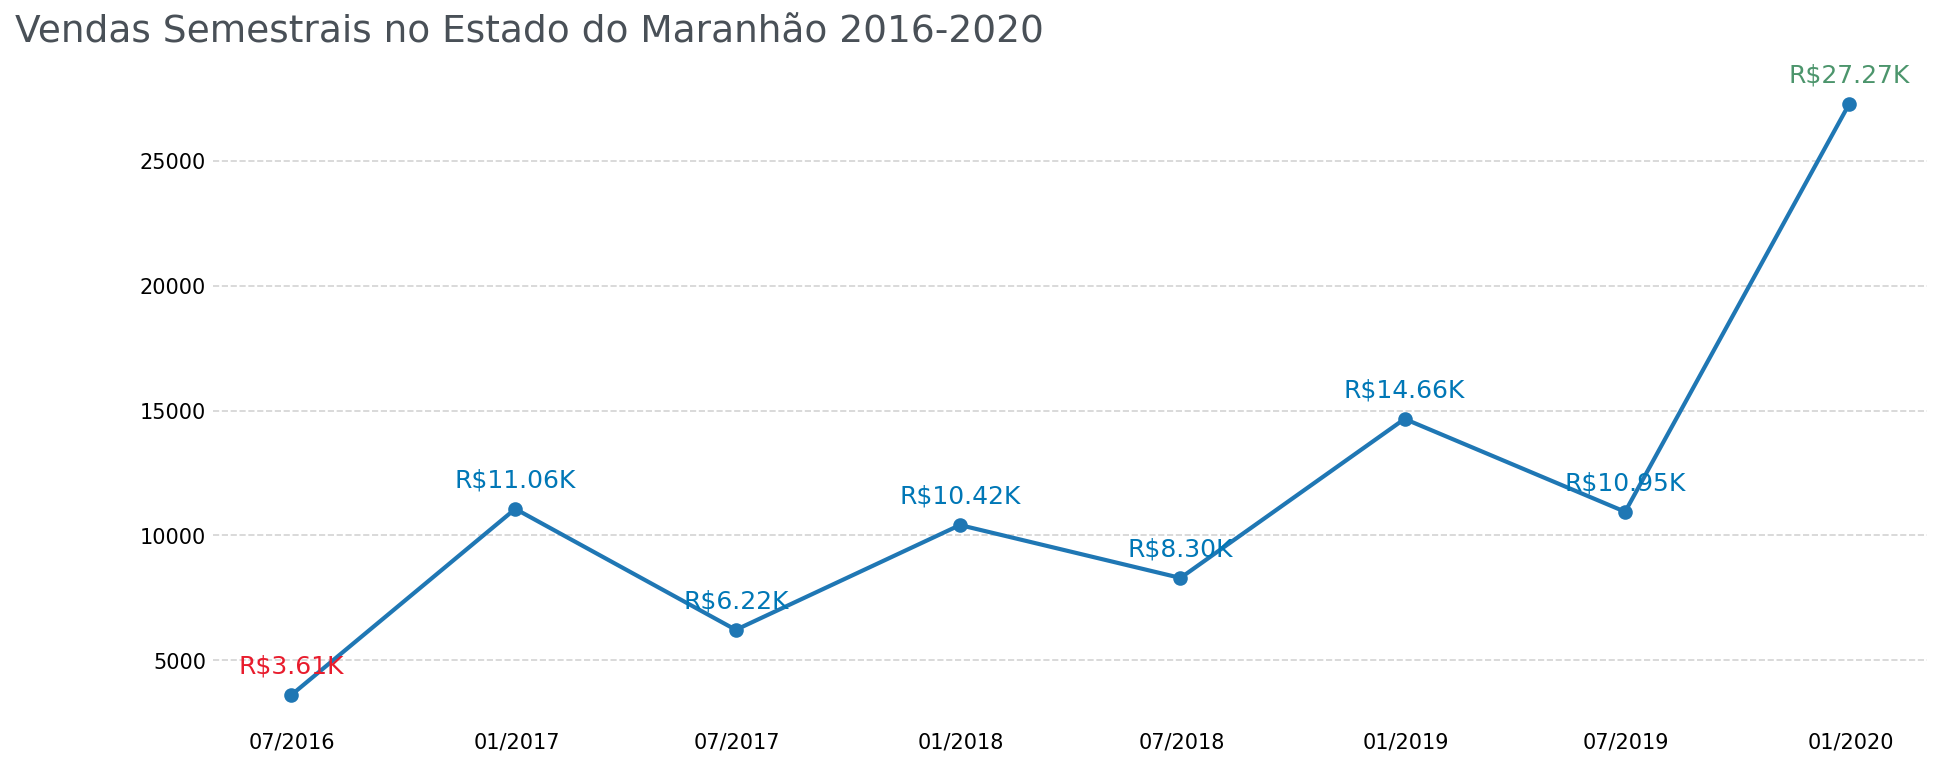

In [28]:
venda_max = vendasMA_semetres["vendas"].max()
venda_min = vendasMA_semetres["vendas"].min()

fig, ax = plt.subplots(figsize=(12, 5), dpi=150, layout="constrained")
fig.suptitle(t="Vendas Semestrais no Estado do Maranhão 2016-2020", color=CINZA2, x=0.22, fontsize=18)

ax.set_frame_on(False)


ax.yaxis.set_major_locator(plt.MultipleLocator(5000))


ax.plot(vendasMA_semetres.index, vendasMA_semetres["vendas"], lw=2, marker='o')
ax.tick_params(axis='both',which="major",length=0)
ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt="%m/%Y"))


for x, y in zip(vendasMA_semetres.index, vendasMA_semetres["vendas"]):
    if y == venda_max:
        cor = VERDE1
    elif y == venda_min:
        cor = "#e81c2d"
    else:
        cor = AZUL2
    ax.annotate(
        text=f"R${y/1_000:.2f}K",
        xy=(x, y),
        xytext=(0, 8),                 
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=12,
        color=cor,
    )


ax.grid(visible=True, color="lightgray", axis="y", ls='--')
plt.show()